# Wisy Test
#### By: Rodolfo Blasser on 20211026

### The purpose of this excercise will be to determine LATAM located people, based on the input file. 

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import os 
os.getcwd()

'C:\\Users\\rodbl\\Desktop'

In [192]:
df = pd.read_csv("people.in", sep="|", header=None, encoding="latin-1")

cols = ["PersonId", "Name", 
        "LastName", "CurrentRole", "Country", 
        "Industry", "NumberOfRecommendations", "NumberOfConnections"]

df.columns = cols
df.head()

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270
3,646158956,craig,gulliver,"vice president, support services",Canada,Computer Software,0,0
4,345736039,isaac,stringer,vice president,United States,Electronics,0,0


In [193]:
df[df['Country']=="Chile"]

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections
329,643030230,carlos,barrera,vice president for latin america,Chile,Manufacturing,0,0
1233,644920827,diego,jeria lobos,NaN,Chile,Chemicals,0,89
1365,644899585,ramon mauricio,labrin fuentes,NaN,Chile,Broadcast Media,0,8
1378,644868636,marcela,canobra bernal,NaN,Chile,Pharmaceuticals,0,161
1648,644786764,dayana,lagos,NaN,Chile,Medical Devices,0,13
1875,644642650,matias,miranda steffanini,NaN,Chile,Food Production,0,500
2071,644808114,mauricio alejandro,vergara ballesteros,NaN,Chile,Museums and Institutions,0,54
2082,644643171,matias,orellana herba,NaN,Chile,Executive Office,0,257
2088,644449118,cecilia,preisig,NaN,Chile,Architecture & Planning,0,1
2128,644890609,diego,covarrubias,NaN,Chile,Wine and Spirits,0,199


In [157]:
## Evaluate if str is ASCII encoded
def ascii(row):
    try:
        if row.isascii() == True:
            return 1
        else:
            return 0
    
    except:
        return 0
    

df['Name_is_ascii'] = df['Name'].apply(lambda row: ascii(row))
df['LastName_is_ascii'] = df['LastName'].apply(lambda row: ascii(row))

df.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0,1,1
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0,1,1
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270,1,1


In [158]:
## Evaluate if compound Name/Last Name 
def words(row):
    try:
        if (" ") in row:
            return 1
        else:
            return 0
    except:
        return 0

df['Name_comp'] = df['Name'].apply(lambda row: words(row))
df['LastName_comp'] = df['LastName'].apply(lambda row: words(row))

df.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0,1,1,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0,1,1,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270,1,1,0,0


In [159]:
## Evaluate LATAM countries

latam = ['Argentina',
        'Bolivia',
        'Brazil',
        'Brasil',
        'Chile',
        'Colombia',
        'Costa Rica',
        'Cuba',
        'Republica Dominicana',
        'República Dominaca',
        'Dominican Republic',
        'Ecuador',
        'El Salvador',
        'Guatemala',
        'Honduras',
        'Mexico',
        'México',
        'Nicaragua',
        'Panama',
        'Panamá',
        'Paraguay',
        'Peru',
        'Perú',
        'Puerto Rico',
        'Haiti',
        'Uruguay',
        'Venezuela']

df['is_latam'] = df['Country'].isin(latam)

def lat(row):
    if row == True:
        return 1
    else:
        return 0
    
df['is_latam'] = df['is_latam'].apply(lambda row: lat(row)) 

df.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0,0,1,1,0,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0,0,1,1,0,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0,270,1,1,0,0,0


## Scale NumberofConnections and NumberofRecommendations

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()
cols = ['NumberOfRecommendations', 'NumberOfConnections' ]
df[['NumberOfConnections','NumberOfRecommendations']] = scaler.fit_transform(df[['NumberOfConnections','NumberOfRecommendations']])

df.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0.0,0.00,1,1,0,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0.0,0.00,1,1,0,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0.0,0.54,1,1,0,0,0


## Reshape data

In [162]:
df1 = df.copy()
cols = ['NumberOfRecommendations', 'NumberOfConnections', "Name_is_ascii", "LastName_is_ascii", "Name_comp", "LastName_comp" , "is_latam"]
df1 = df1.reindex(columns=cols)
df1.head(3)

,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,0.0,0.00,1,1,0,0,0
1,0.0,0.00,1,1,0,0,0
2,0.0,0.54,1,1,0,0,0


## Check for imbalaced data


Representation: 7%


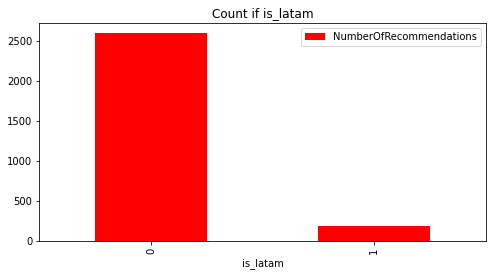

In [163]:
col = "is_latam"

dfx = df1.copy()
dfx = dfx.groupby([col])[dfx.columns[0]].count()
dfx = dfx.reset_index()
dfx.plot(kind='bar',x=dfx.columns[0],y=dfx.columns[1],color='red', figsize = (8,4), title = "Count if {}".format(col))
print("\nRepresentation: " + '{:.0%}'.format((df1[df1[col]==1].shape[0]/df1.shape[0])))
plt.show()

## First try

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Accuracy = 0.94
Recall = 0.38



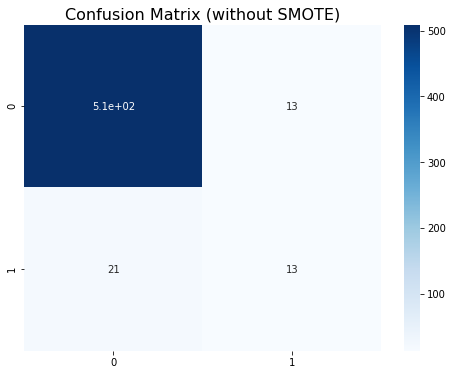

In [165]:
# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

## Second try [oversampling LATAM]

In [166]:
from imblearn.over_sampling import SMOTE 
import pickle

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

# Latam = 1 , Other = 0
print('\nBalance of 0 and 1 classes (%):')
np.count_nonzero(y_sm)/y_sm.shape[0]

Shape of X before SMOTE: (2779, 6)
Shape of X after SMOTE: (5196, 6)

Balance of 0 and 1 classes (%):


0.5

Accuracy = 0.88
Recall = 0.85



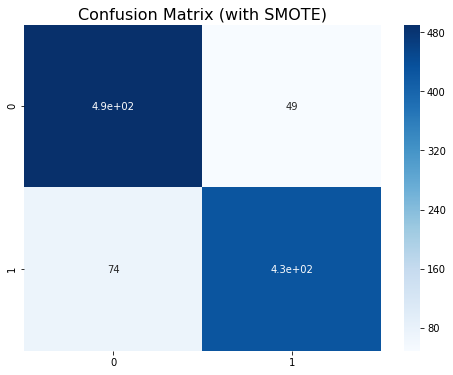

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [168]:
predictions = model.predict_proba(X_test)
print(predictions)

[[0.90919304 0.09080696]
 [0.90919304 0.09080696]
 [0.0425     0.9575    ]
 ...
 [1.         0.        ]
 [0.90919304 0.09080696]
 [0.         1.        ]]


In [169]:
filename = 'latam_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [170]:
d0 = pd.DataFrame(X_test)
d1 = pd.DataFrame(y_test)
d2 = pd.DataFrame(predictions)

In [171]:
dfx = pd.merge(d0, d1,left_index=True, right_index=True)
dfx = dfx.merge(d2, left_index=True, right_index=True)

cols = ['NumberOfRecommendations', 'NumberOfConnections', 'Name_is_ascii',
       'LastName_is_ascii', 'Name_comp', 'LastName_comp', 'is_latam', "Prob_no", "Prob_yes"]

dfx.columns = cols
dfx

,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam,Prob_no,Prob_yes
0,0.0,0.000000,1.0,1.0,0.0,0.0,0,0.909193,0.090807
1,0.0,0.000000,1.0,1.0,0.0,0.0,0,0.909193,0.090807
2,0.0,0.003034,0.0,1.0,1.0,1.0,1,0.042500,0.957500
3,0.0,0.271408,1.0,0.0,1.0,1.0,1,0.000000,1.000000
4,0.0,0.002000,1.0,1.0,0.0,0.0,1,0.179175,0.820825
...,...,...,...,...,...,...,...,...,...
1035,0.0,0.000000,1.0,1.0,0.0,0.0,0,0.909193,0.090807
1036,0.0,0.000000,1.0,1.0,0.0,0.0,0,0.909193,0.090807
1037,0.0,0.020000,1.0,1.0,0.0,0.0,0,1.000000,0.000000
1038,0.0,0.000000,1.0,1.0,0.0,0.0,0,0.909193,0.090807


## Final Pipeline

In [172]:
dfz = df.copy()
dfz.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0.0,0.00,1,1,0,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0.0,0.00,1,1,0,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0.0,0.54,1,1,0,0,0


In [173]:
def ascii(row):
    try:
        if row.isascii() == True:
            return 1
        else:
            return 0
    
    except:
        return 0
    

dfz['Name_is_ascii'] = dfz['Name'].apply(lambda row: ascii(row))
dfz['LastName_is_ascii'] = dfz['LastName'].apply(lambda row: ascii(row))

In [174]:
## Evaluate if compound Name/Last Name 
def words(row):
    try:
        if (" ") in row:
            return 1
        else:
            return 0
    except:
        return 0

dfz['Name_comp'] = dfz['Name'].apply(lambda row: words(row))
dfz['LastName_comp'] = dfz['LastName'].apply(lambda row: words(row))

dfz.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0.0,0.00,1,1,0,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0.0,0.00,1,1,0,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0.0,0.54,1,1,0,0,0


In [175]:
scaler = MinMaxScaler()
cols = ['NumberOfRecommendations', 'NumberOfConnections' ]
dfz[['NumberOfConnections','NumberOfRecommendations']] = scaler.fit_transform(dfz[['NumberOfConnections','NumberOfRecommendations']])

dfz.head(3)

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,573435640,jean,harion,vice president,Dominica,Telecommunications,0.0,0.00,1,1,0,0,0
1,337983069,meredith,kopit-levien,chief revenue officer,United States,Publishing,0.0,0.00,1,1,0,0,0
2,556570894,daniel,roe,"vp, customer operations and support",United States,Computer Software,0.0,0.54,1,1,0,0,0


In [176]:
ids = dfz['PersonId']

In [177]:
cols = ['NumberOfRecommendations', 'NumberOfConnections', "Name_is_ascii", "LastName_is_ascii", "Name_comp", "LastName_comp" , "is_latam"]
dfz = dfz.reindex(columns=cols)
dfz.head(3)

,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
0,0.0,0.00,1,1,0,0,0
1,0.0,0.00,1,1,0,0,0
2,0.0,0.54,1,1,0,0,0


In [178]:
X = dfz.iloc[:, :-1].values
probs = pd.DataFrame(model.predict_proba(X))
probs.head(3)

,0,1
0,0.909193,0.090807
1,0.909193,0.090807
2,0.690000,0.310000


In [179]:
dfy = pd.DataFrame(data=ids)

In [180]:
dfy = dfy.merge(probs, left_index=True, right_index=True)
cols = ["PersonId","Prob_no", "Prob_yes"]
dfy.columns = cols

dfy = dfy.sort_values('Prob_yes', ascending=False)
dfy = dfy.head(100)
dfy

,PersonId,Prob_no,Prob_yes
1811,644903083,0.0000,1.0000
2119,644219422,0.0000,1.0000
2663,644887833,0.0000,1.0000
1913,644211479,0.0000,1.0000
1909,644142560,0.0000,1.0000
...,...,...,...
1149,644072759,0.0400,0.9600
2147,644543448,0.0400,0.9600
1236,644487637,0.0525,0.9475
1281,644208507,0.0600,0.9400


## Export result

In [136]:
dfy['PersonId'].to_csv("people.out", index=False)

C:\Users\rodbl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Validation of the model

In [147]:
top = dfy['PersonId'].to_list()
df['is_top'] = df['PersonId'].isin(top)
df['is_latam'] = df['Country'].isin(latam)

df_latam = df[(df['is_top']==True) & (df['is_latam']==True)]
df_latam

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,is_top,is_latam
43,110964914,ralph,gauer,vp,Mexico,Museums and Institutions,2,96,True,True
468,639691474,diego,mendonca,desarrolador web (front-end) independiente,Argentina,Design,0,205,True,True
900,644143040,luiz roberto,pires,NaN,Brazil,Automotive,13,500,True,True
908,644227721,denisse,becerril,NaN,Mexico,Telecommunications,0,253,True,True
955,644564360,reparaciÃ³n de pc,x,NaN,Uruguay,Information Technology and Services,0,10,True,True
...,...,...,...,...,...,...,...,...,...,...
2663,644887833,diego,rodrigues de freitas,NaN,Brazil,Banking,0,70,True,True
2747,644047044,marÃ­a rosa,garrido dÃ­az,NaN,Chile,Banking,0,1,True,True
2758,644503042,diana,vargas del portal,NaN,Panama,Human Resources,0,456,True,True
2767,644749524,oscar eduardo,fraschetto valdÃ©s,NaN,Mexico,Construction,0,500,True,True


In [149]:
df_latam.groupby('Country')['PersonId'].count()

Country
Argentina       3
Brazil         40
Chile           9
Colombia        8
Costa Rica      2
Ecuador         1
Mexico         18
Panama          1
Peru            1
Puerto Rico     1
Uruguay         3
Name: PersonId, dtype: int64

In [148]:
df_latam['Country'].drop_duplicates()

43           Mexico
468       Argentina
900          Brazil
955         Uruguay
1233          Chile
1715     Costa Rica
1986       Colombia
2014    Puerto Rico
2628           Peru
2758         Panama
2769        Ecuador
Name: Country, dtype: object

In [154]:
df[df['PersonId']==644903083]['Name'].item()

C:\Users\rodbl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


'marx ulises'

,PersonId,Name,LastName,CurrentRole,Country,Industry,NumberOfRecommendations,NumberOfConnections,Name_is_ascii,LastName_is_ascii,Name_comp,LastName_comp,is_latam
329,643030230,carlos,barrera,vice president for latin america,Chile,Manufacturing,0.0,0.000,1,1,0,0,1
1233,644920827,diego,jeria lobos,NaN,Chile,Chemicals,0.0,0.178,1,1,0,1,1
1365,644899585,ramon mauricio,labrin fuentes,NaN,Chile,Broadcast Media,0.0,0.016,1,1,1,1,1
1378,644868636,marcela,canobra bernal,NaN,Chile,Pharmaceuticals,0.0,0.322,1,1,0,1,1
1648,644786764,dayana,lagos,NaN,Chile,Medical Devices,0.0,0.026,1,1,0,0,1
1875,644642650,matias,miranda steffanini,NaN,Chile,Food Production,0.0,1.000,1,1,0,1,1
2071,644808114,mauricio alejandro,vergara ballesteros,NaN,Chile,Museums and Institutions,0.0,0.108,1,1,1,1,1
2082,644643171,matias,orellana herba,NaN,Chile,Executive Office,0.0,0.514,1,1,0,1,1
2088,644449118,cecilia,preisig,NaN,Chile,Architecture & Planning,0.0,0.002,1,1,0,0,1
2128,644890609,diego,covarrubias,NaN,Chile,Wine and Spirits,0.0,0.398,1,1,0,0,1
